## 2) Salary_hike -> Build a prediction model for Salary_hike


## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# 1. Importing necessary libraries

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression

from pickle import dump,load

import warnings
warnings.filterwarnings('ignore')

# 2. Data Collection

In [3]:
sal_data = pd.read_csv(r"D:\Data Science\DS Assignments\Simple_linear_regression\Salary_Data.csv")
sal_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# 3. Data Understanding

## 3.1 Initial Analysis

In [5]:
sal_data.shape

(30, 2)

In [4]:
sal_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## 3.2 Assumption Check

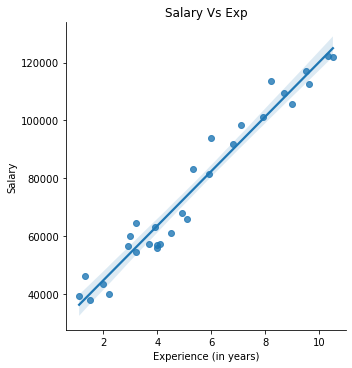

In [64]:
sns.lmplot( x='YearsExperience', y='Salary', data=sal_data)
plt.title('Salary Vs Exp')
plt.xlabel('Experience (in years)')
plt.show()

### Linearity test is Failed

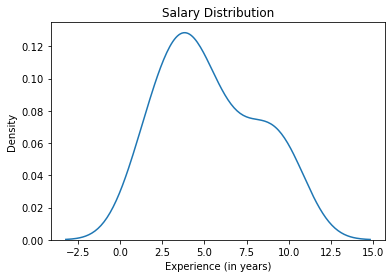

In [10]:
sns.kdeplot(x='YearsExperience', data=sal_data)
plt.title('Salary Distribution')
plt.xlabel('Experience (in years)')
plt.show()

### Normality test is also Failed

# 4. Model Building

In [16]:
X=sal_data[['YearsExperience']]
y=sal_data[['Salary']]

# 5. Model Training

In [17]:
linear_model = LinearRegression()  #Model Initialization
linear_model.fit(X,y)

LinearRegression()

In [18]:
linear_model.coef_

array([[9449.96232146]])

In [19]:
linear_model.intercept_

array([25792.20019867])

# 6. Model Testing

In [34]:
y_pred=pd.DataFrame({'Experience(yrs)':sal_data['YearsExperience'],
                     'Salary_actual':sal_data['Salary']}) 

y_pred['Salary_pred'] = linear_model.predict(X)
y_pred

,Experience(yrs),Salary_actual,Salary_pred
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


# 7. Model Evaluation

In [35]:
y_pred['Error']=y_pred['Salary_actual']-y_pred['Salary_pred']
y_pred

,Experience(yrs),Salary_actual,Salary_pred,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306
5,2.9,56642.0,53197.090931,3444.909069
6,3.0,60150.0,54142.087163,6007.912837
7,3.2,54445.0,56032.079627,-1587.079627
8,3.2,64445.0,56032.079627,8412.920373
9,3.7,57189.0,60757.060788,-3568.060788


# Data Transformation

In [57]:
log_transformed = sal_data.transform(np.log)
log_transformed.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


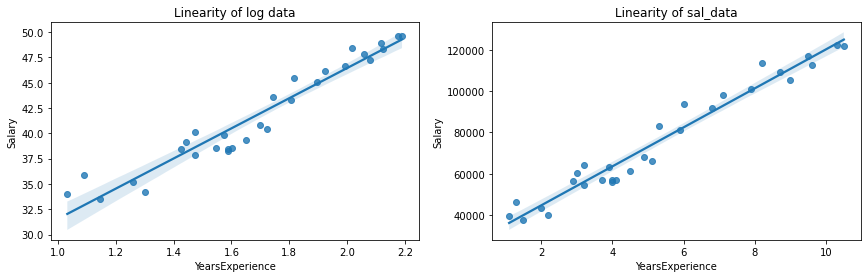

In [70]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=2)

sns.regplot(x='YearsExperience', y='Salary', data=log_transformed, ax=axes[0])
axes[0].set_title('Linearity of log data')

sns.regplot(x='YearsExperience', y='Salary', data=sal_data, ax=axes[1])
axes[1].set_title('Linearity of sal_data')

plt.show()

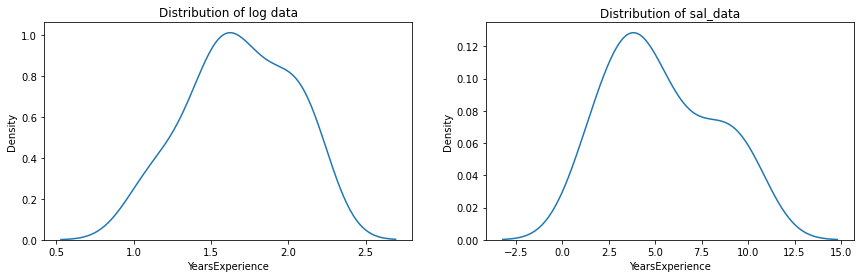

In [71]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=2)

sns.kdeplot( x='YearsExperience', data=log_transformed, ax=axes[0])
axes[0].set_title('Distribution of log data')

sns.kdeplot( x='YearsExperience', data=sal_data, ax=axes[1])
axes[1].set_title('Distribution of sal_data')

plt.show()

In [69]:
cbrt_transformed = sal_data.transform(np.cbrt)
cbrt_transformed.head()

,YearsExperience,Salary
0,1.032280,34.011242
1,1.091393,35.883626
2,1.144714,33.540235
3,1.259921,35.175984
4,1.300591,34.168426


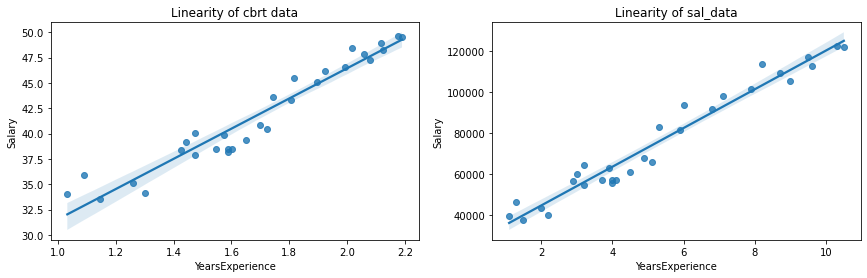

In [72]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=2)

sns.regplot( x='YearsExperience', y='Salary', data=cbrt_transformed, ax=axes[0])
axes[0].set_title('Linearity of cbrt data')

sns.regplot( x='YearsExperience', y='Salary', data=sal_data, ax=axes[1])
axes[1].set_title('Linearity of sal_data')

plt.show()

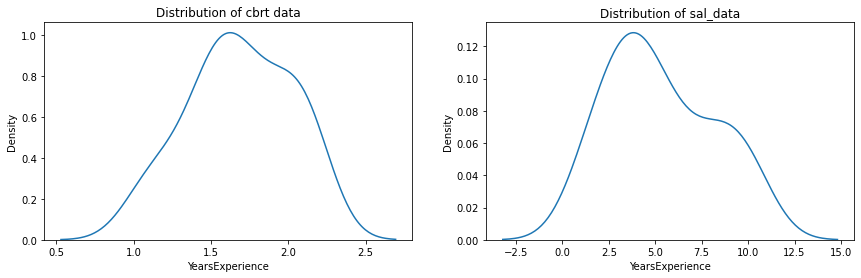

In [73]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=2)

sns.kdeplot( x='YearsExperience', data=log_transformed, ax=axes[0])
axes[0].set_title('Distribution of cbrt data')

sns.kdeplot( x='YearsExperience', data=sal_data, ax=axes[1])
axes[1].set_title('Distribution of sal_data')

plt.show()

## Linearity and Normality are same even after data transformation hence choosing previously built linear model

# 8. Model Deployment

In [75]:
dump(linear_model,open('salary_hike_intelligence.pkl','wb'))

In [76]:
linear_model_loaded=load(open('salary_hike_intelligence.pkl','rb'))

In [87]:
inp=pd.DataFrame({'Experience':[2,3,4]})
inp

,Experience
0,2
1,3
2,4


In [88]:
inp['Salary Estimated']=linear_model_loaded.predict(inp)
inp

,Experience,Salary Estimated
0,2,44692.124842
1,3,54142.087163
2,4,63592.049484
